# Horizon Surfaces of Kerr Metric

$$
\begin{eqnarray}
&g_{\mu\nu}=\left( \begin{array}{ccc} g_{tt}(r,\theta) & 0 & 0 & g_{t\phi}(r,\theta)\\ 0&  g_{rr}(r,\theta)&  0&0 \\ 0&  0&  g_{\theta\theta}(r,\theta)& 0\\ g_{\phi t}(r,\theta)&  0&  0& g_{\phi\phi}(r,\theta)\\ \end{array} \right)& \\
& g_{tt}(r,\theta)=\left( \frac{1-2\,M\,r}{\rho^2} \right)\,\,, \, g_{t\phi}(r,\theta)=\frac{2aMr\hbox{sin}^2(\theta)}{\rho^2}  &\\ 
&g_{rr}(r,\theta)=-\frac{\rho^2}{\Delta}\,\,, \quad g_{\theta\theta}(r,\theta)=-\rho^2\,\,, \, & \\
&g_{\phi\phi}(r,\theta)=-\left( \frac{r^2+a^2+2 M r a^2 \hbox{sin}^2(\theta)}{\rho^2} \right)\hbox{sin}^2(\theta)\,\,,&\\
&\rho^2=r^2+a^2 \hbox{cos}^2(\theta) \,\,, \quad \Delta=r^2-2Mr+a^2&
\end{eqnarray}
$$

### Prefix

In [2]:
# import main code
import sys
sys.path.append('/home/jannik/MA/fertige-MA/gitrepo')
from master_project import *

# import additional modules
from sympy import *
init_printing()
from einsteinpy.symbolic import *
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

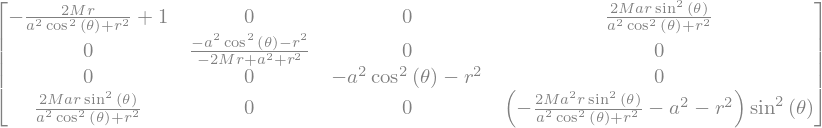

In [3]:
# define Kerr metric
t, r, theta, phi, M, a = symbols('t, r, theta, phi, M, a')
rho2 = r**2+(a*cos(theta))**2
Delta = r**2-2*M*r+a**2
Metric = Matrix([[(1-2*M*r/rho2), 0, 0, (2*a*M*r*(sin(theta))**2)/rho2], 
                 [0, -rho2/Delta, 0, 0], 
                 [0, 0, -rho2, 0], 
                 [(2*a*M*r*(sin(theta))**2)/rho2, 0, 0
                  , -(r**2+a**2+(2*M*r*a**2*(sin(theta))**2)/rho2)*(sin(theta))**2]]).tolist()
g = MetricTensor(Metric, [t, r, theta, phi])
g.tensor()

### Event horizon if: $g_{rr}\rightarrow\infty$ or $g^{rr}=0$ $\Rightarrow$ $
r_{\pm}= M \pm \sqrt{M^2 - a^2}$

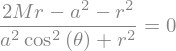

In [4]:
# equation g^{rr} = 0
eq_event_horizon = Eq(g.inv()[1,1],0)
eq_event_horizon

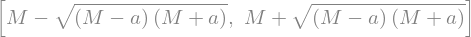

In [5]:
# solution for r
sol_event_horizon = solve(eq_event_horizon, r)
sol_event_horizon

### Stationary limit surfaces: $g_{tt} = 0$ $\Rightarrow$ $r_{S\pm}= M \pm \sqrt{M^2 - a^2{{\rm cos}^2(\theta)}}$


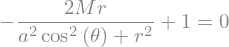

In [6]:
# equation g_{tt}=0
eq_ergosphere = Eq(g.tensor()[0,0],0)
eq_ergosphere

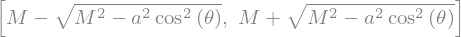

In [7]:
# solution for r 
sol_ergosphere = solve(eq_ergosphere,r)
sol_ergosphere

### Calculate surfaces

In [8]:
# Lambdifying of symbolic functions
r_plus = lambdify((a), sol_event_horizon[1].subs({(M,1)}))
r_minus = lambdify((a), sol_event_horizon[0].subs({(M,1)}))
r_E_plus = lambdify((a,theta), sol_ergosphere[1].subs({(M,1)}))
r_E_minus = lambdify((a,theta), sol_ergosphere[0].subs({(M,1)}))

In [9]:
# calculate surfaces at r_+- and r_E+- and r_ring
def get_surfaces(a, THETA, PHI):

    # r_+ 
    R = np.sqrt(r_plus(a)**2+a**2) 
    r_plus_X = R * np.sin(THETA) * np.cos(PHI)
    r_plus_Y = R * np.sin(THETA) * np.sin(PHI) 
    r_plus_Z = r_plus(a) * np.cos(THETA)
    r_plus_XYZ = [r_plus_X, r_plus_Y, r_plus_Z]

    # r_-
    R = np.sqrt(r_minus(a)**2+a**2)
    r_minus_X = R * np.sin(THETA) * np.cos(PHI)
    r_minus_Y = R * np.sin(THETA) * np.sin(PHI) 
    r_minus_Z = r_minus(a)* np.cos(THETA)
    r_minus_XYZ = [r_minus_X, r_minus_Y, r_minus_Z]

    # r_S+
    R = np.sqrt(r_E_plus(a,THETA)**2+a**2)
    r_E_plus_X = R * np.sin(THETA) * np.cos(PHI)
    r_E_plus_Y = R * np.sin(THETA) * np.sin(PHI) 
    r_E_plus_Z = r_E_plus(a,THETA) * np.cos(THETA)
    r_E_plus_XYZ = [r_E_plus_X, r_E_plus_Y, r_E_plus_Z]

    # r_S-
    R = np.sqrt(r_E_minus(a,THETA)**2+a**2)
    r_E_minus_X = R * np.sin(THETA) * np.cos(PHI)
    r_E_minus_Y = R * np.sin(THETA) * np.sin(PHI) 
    r_E_minus_Z = r_E_minus(a,THETA) * np.cos(THETA)
    r_E_minus_XYZ = [r_E_minus_X, r_E_minus_Y, r_E_minus_Z]

    # r_ring
    radius = a 
    theta = np.linspace(0, 2*np.pi, 100)
    ring_X = radius * np.cos(theta)
    ring_Y = radius * np.sin(theta)
    ring_Z = np.zeros_like(theta)
    ring_XYZ = [ring_X, ring_Y, ring_Z]
    
    return r_plus_XYZ, r_minus_XYZ, r_E_plus_XYZ, r_E_minus_XYZ, ring_XYZ

### Plotting surfaces

In [10]:
# setting global plot parameters
size = 28
params = {'xtick.labelsize' : size, 
          'ytick.labelsize' : size, 
          'axes.labelsize' : size, 
          'legend.fontsize' : size, 
          'font.size' : size,
          'axes.titlesize': size
         }
plt.rcParams.update(params)

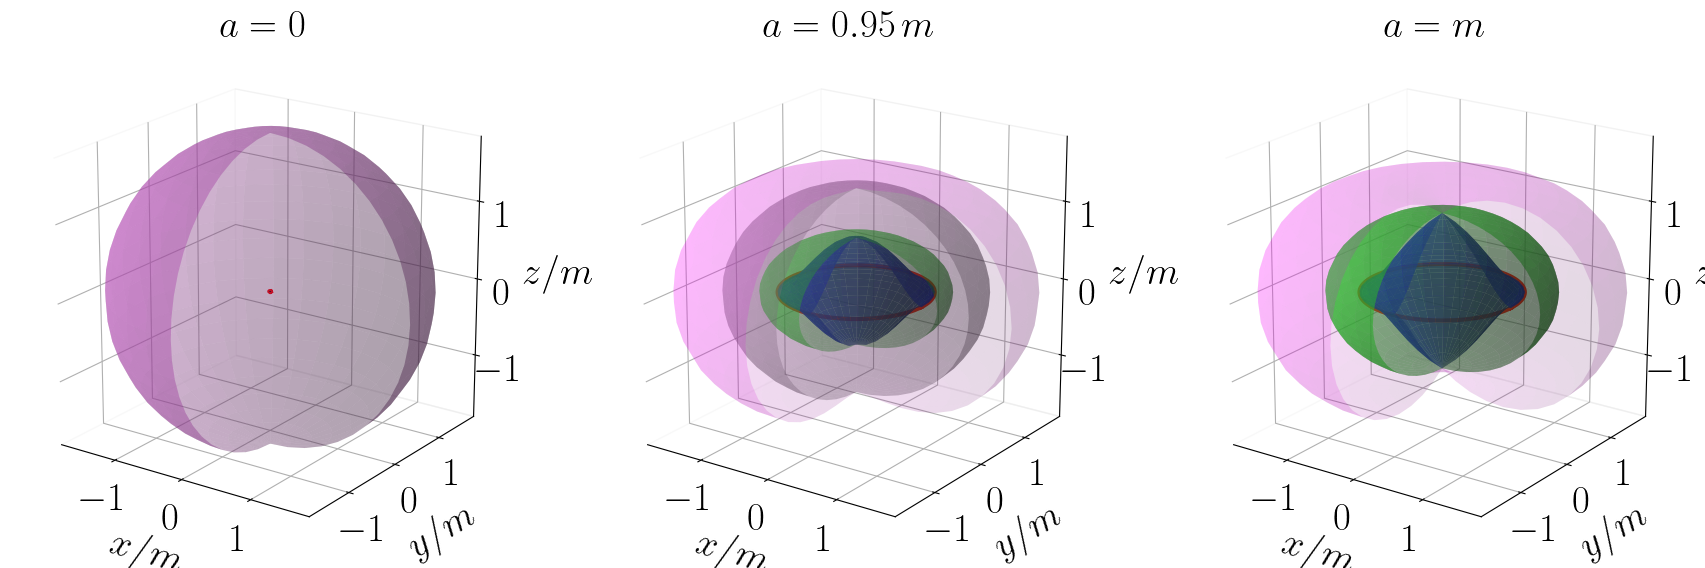

In [12]:
# setup plotting 
fig = plt.figure(figsize = (18,6))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')
ax1.set_box_aspect([1,1,1])
ax2.set_box_aspect([1,1,1])
ax3.set_box_aspect([1,1,1])

# coordinate grid
ntheta, nphi = np.linspace(0, np.pi, 25), np.linspace(0, 1.5*np.pi, 25)
THETA, PHI = np.meshgrid(ntheta, nphi)

# limit of axes
lim_axes = 1.75

# plot 1
a = 0.01
r_plus_XYZ, r_minus_XYZ, r_E_plus_XYZ, r_E_minus_XYZ, ring_XYZ = get_surfaces(a, THETA, PHI) 
ax1.plot_surface(r_E_plus_XYZ[0], r_E_plus_XYZ[1], r_E_plus_XYZ[2], color="magenta", alpha=0.15)
ax1.plot_surface(r_plus_XYZ[0], r_plus_XYZ[1], r_plus_XYZ[2], color="grey", alpha=0.3, edgecolor='none')
ax1.plot_surface(r_minus_XYZ[0], r_minus_XYZ[1], r_minus_XYZ[2], color="lime", alpha=0.4, edgecolor='none')
ax1.plot_surface(r_E_minus_XYZ[0], r_E_minus_XYZ[1], r_E_minus_XYZ[2], color="blue", alpha=0.8, edgecolor='none')
ax1.plot(ring_XYZ[0], ring_XYZ[1], ring_XYZ[2], color='red', linewidth=3)

# plot 2
a = 0.95
r_plus_XYZ, r_minus_XYZ, r_E_plus_XYZ, r_E_minus_XYZ, ring_XYZ = get_surfaces(a, THETA, PHI) 
ax2.plot_surface(r_E_plus_XYZ[0], r_E_plus_XYZ[1], r_E_plus_XYZ[2], color="magenta", alpha=0.15, edgecolor='none')
ax2.plot_surface(r_plus_XYZ[0], r_plus_XYZ[1], r_plus_XYZ[2], color="grey", alpha=0.3, edgecolor='none')
ax2.plot_surface(r_minus_XYZ[0], r_minus_XYZ[1], r_minus_XYZ[2], color="lime", alpha=0.4, edgecolor='none')
ax2.plot_surface(r_E_minus_XYZ[0], r_E_minus_XYZ[1], r_E_minus_XYZ[2], color="blue", alpha=0.8, edgecolor='none')
ax2.plot(ring_XYZ[0], ring_XYZ[1], ring_XYZ[2], color='red', linewidth=3)

# plot 3
a = 1.
r_plus_XYZ, r_minus_XYZ, r_E_plus_XYZ, r_E_minus_XYZ, ring_XYZ = get_surfaces(a, THETA, PHI) 
ax3.plot_surface(r_E_plus_XYZ[0], r_E_plus_XYZ[1], r_E_plus_XYZ[2], color="magenta", alpha=0.15, edgecolor='none')
ax3.plot_surface(r_plus_XYZ[0], r_plus_XYZ[1], r_plus_XYZ[2], color="grey", alpha=0.3, edgecolor='none')
ax3.plot_surface(r_minus_XYZ[0], r_minus_XYZ[1], r_minus_XYZ[2], color="lime", alpha=0.4, edgecolor='none')
ax3.plot_surface(r_E_minus_XYZ[0], r_E_minus_XYZ[1], r_E_minus_XYZ[2], color="blue", alpha=0.8, edgecolor='none')
ax3.plot(ring_XYZ[0], ring_XYZ[1], ring_XYZ[2], color='red', linewidth=3)

# additional plot settings
ax1.set_title(r"$a=0$")
ax1.set_ylabel(r"$y/m$", labelpad=15)
ax1.set_xlabel(r"$x/m$", labelpad=15)
ax1.set_zlabel(r"$z/m$", labelpad=17)
ax1.zaxis.set_rotate_label(False)
ax1.set_xlim(-lim_axes, lim_axes)
ax1.set_ylim(-lim_axes, lim_axes)
ax1.set_zlim(-lim_axes, lim_axes)
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
ax1.view_init(azim=-55, elev=20)

ax2.set_title(r"$ a=0.95\,m$")
ax2.set_ylabel(r"$y/m$", labelpad=15)
ax2.set_xlabel(r"$x/m$", labelpad=15)
ax2.set_zlabel(r"$z/m$", labelpad=17)
ax2.zaxis.set_rotate_label(False)
ax2.set_xlim(-lim_axes, lim_axes)
ax2.set_ylim(-lim_axes, lim_axes)
ax2.set_zlim(-lim_axes, lim_axes)
ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False
ax2.view_init(azim=-55, elev=20)

ax3.set_title(r"$a=m$")
ax3.set_ylabel(r"$y/m$", labelpad=15)
ax3.set_xlabel(r"$x/m$", labelpad=15)
ax3.set_zlabel(r"$z/m$", labelpad=17)
ax3.zaxis.set_rotate_label(False)
ax3.set_xlim(-lim_axes, lim_axes)
ax3.set_ylim(-lim_axes, lim_axes)
ax3.set_zlim(-lim_axes, lim_axes)
ax3.xaxis.pane.fill = False
ax3.yaxis.pane.fill = False
ax3.zaxis.pane.fill = False
ax3.view_init(azim=-55, elev=20)

# save and show
fig.tight_layout()
#fig.savefig('KerrEventHorizons.pdf', bbox_inches='tight')
plt.show()